# Course: Foundations of Machine Learning Frameworks
## Practical Lab 3 - Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification
### *Name: Neha Yadav*
### *Ran Feldesh*
### Due date: 1st Dec'24

### Framing the Problem:
- The aim of this lab is to explore the common practice of Deep Learning Engineers, focusing on fine-tuning existing models to suit their specific tasks.

### 1. Getting the Data:
- Obtaining the Data: Getting the Dogs vs Cats dataset https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip

In [1]:
import os, shutil, pathlib
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_dir = pathlib.Path("./data/train")
new_base_dir = pathlib.Path("./data/dogs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### 2. EDA: Explore the data with relevant graphs, statistics and insights

In [ ]:
# Defining the directories
train_dir = './data/dogs_cats_small/train'
validation_dir = './data/dogs_cats_small/validation'
test_dir = './data/dogs_cats_small/test'

# Function to count images in a directory
def count_images(directory):
    cat_count = len(os.listdir(os.path.join(directory, 'cat')))
    dog_count = len(os.listdir(os.path.join(directory, 'dog')))
    return cat_count, dog_count

# Getting counts for each dataset
train_cat_count, train_dog_count = count_images(train_dir)
val_cat_count, val_dog_count = count_images(validation_dir)
test_cat_count, test_dog_count = count_images(test_dir)

# Creating a summary DataFrame
data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Cats': [train_cat_count, val_cat_count, test_cat_count],
    'Dogs': [train_dog_count, val_dog_count, test_dog_count]
}

df = pd.DataFrame(data)
print(df)

      Dataset  Cats  Dogs
0       Train  1000  1000
1  Validation   500   500
2        Test  1000  1000


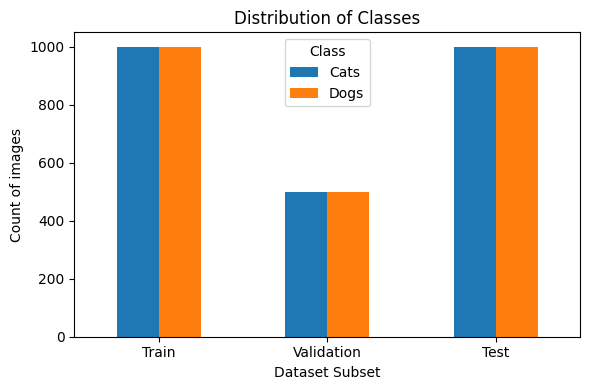

In [4]:
# Plotting the bar plot
df.set_index('Dataset').plot(kind='bar', figsize=(6, 4))
plt.title('Distribution of Classes')
plt.xlabel('Dataset Subset')
plt.ylabel('Count of images')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

- The dataset is well-balanced with 1000 cat and dog images each in the training and test sets, and 500 images per class in the validation set, facilitating effective model training and evaluation.

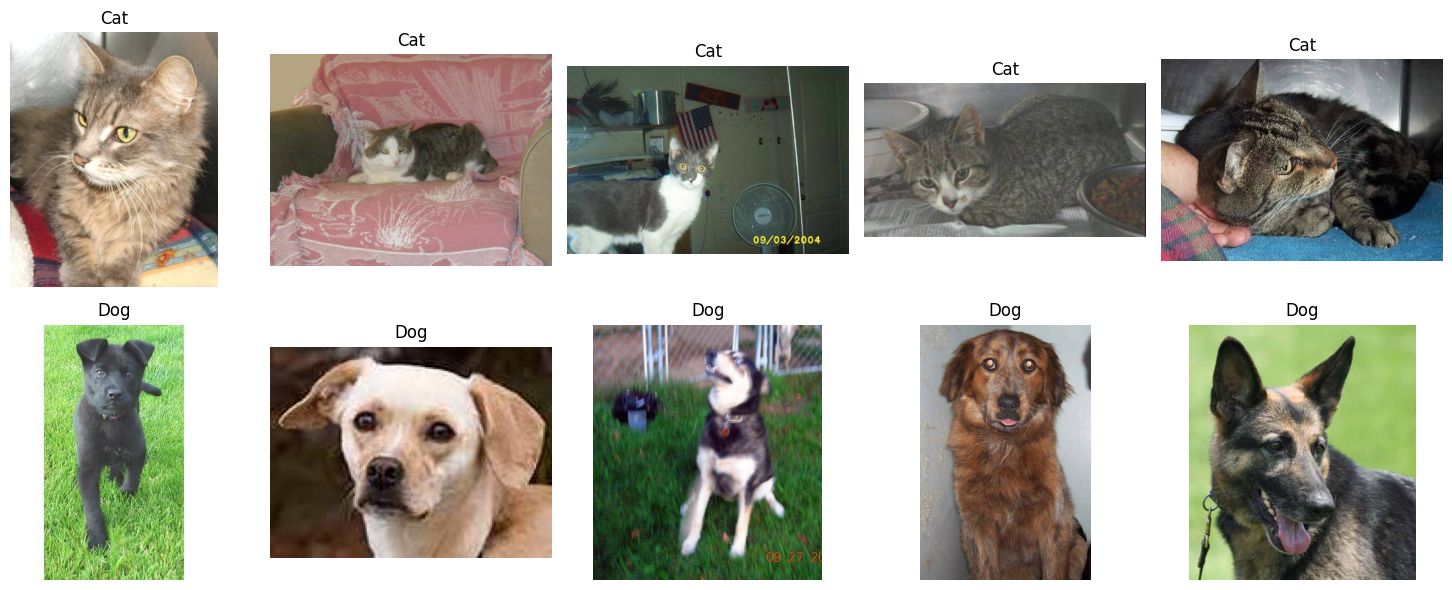

In [ ]:
import random
import os
from PIL import Image

# Function to display random images from each class
def display_random_images(num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    for i in range(num_images):
        # Randomly select a cat and a dog image
        cat_image = random.choice(os.listdir(os.path.join(train_dir, 'cat')))
        dog_image = random.choice(os.listdir(os.path.join(train_dir, 'dog')))
        
        # Load images
        cat_img = Image.open(os.path.join(train_dir, 'cat', cat_image))
        dog_img = Image.open(os.path.join(train_dir, 'dog', dog_image))
        
        # Display images
        axes[0, i].imshow(cat_img)
        axes[0, i].set_title('Cat')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(dog_img)
        axes[1, i].set_title('Dog')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

display_random_images()

- The images display a diverse range of cats and dogs, showcasing breeds, colors, and poses. Random sampling confirms distinct features, showcasing the dataset's richness, essential for effective classification model training.

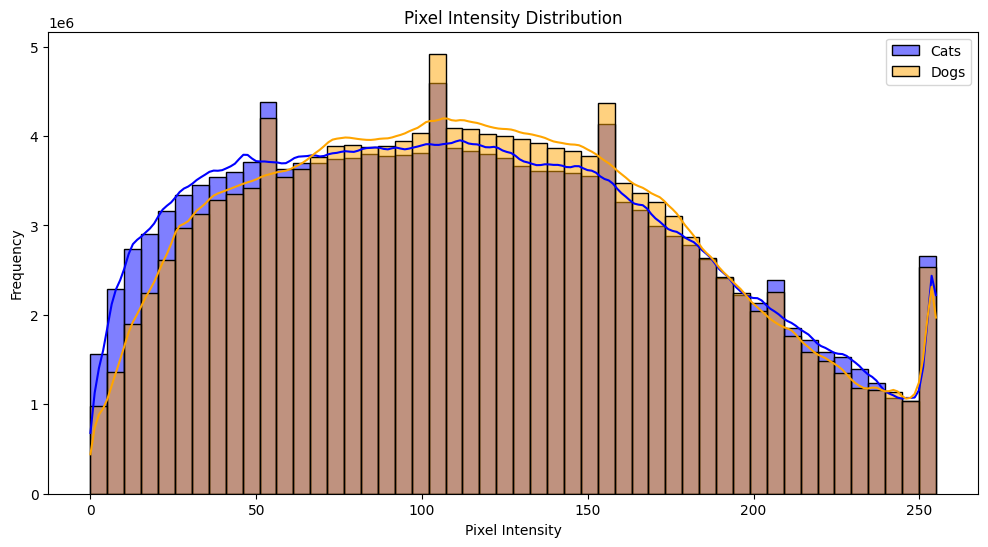

In [6]:
import numpy as np
import seaborn as sns

# Function to plot pixel intensity distribution
def plot_pixel_intensity_distribution(directory):
    cat_pixels = []
    dog_pixels = []
    
    # Collect pixel intensities for cats
    for img_file in os.listdir(os.path.join(directory, 'cat')):
        img = Image.open(os.path.join(directory, 'cat', img_file)).convert('L')
        cat_pixels.extend(np.array(img).flatten())
    
    # Collect pixel intensities for dogs
    for img_file in os.listdir(os.path.join(directory, 'dog')):
        img = Image.open(os.path.join(directory, 'dog', img_file)).convert('L')
        dog_pixels.extend(np.array(img).flatten())
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.histplot(cat_pixels, bins=50, color='blue', label='Cats', kde=True)
    sns.histplot(dog_pixels, bins=50, color='orange', label='Dogs', kde=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot for training dataset
plot_pixel_intensity_distribution(train_dir)

- The pixel intensity distribution shows overlapping patterns between cats and dogs, with cats showing darker intensities and dogs having a more even distribution, which could improve the model's ability to differentiate between the two classes during training.

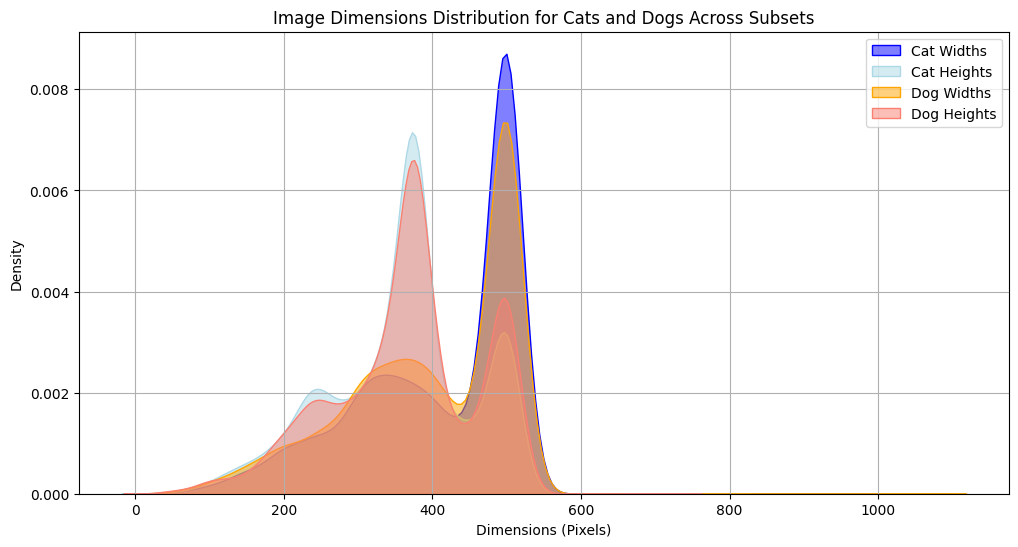

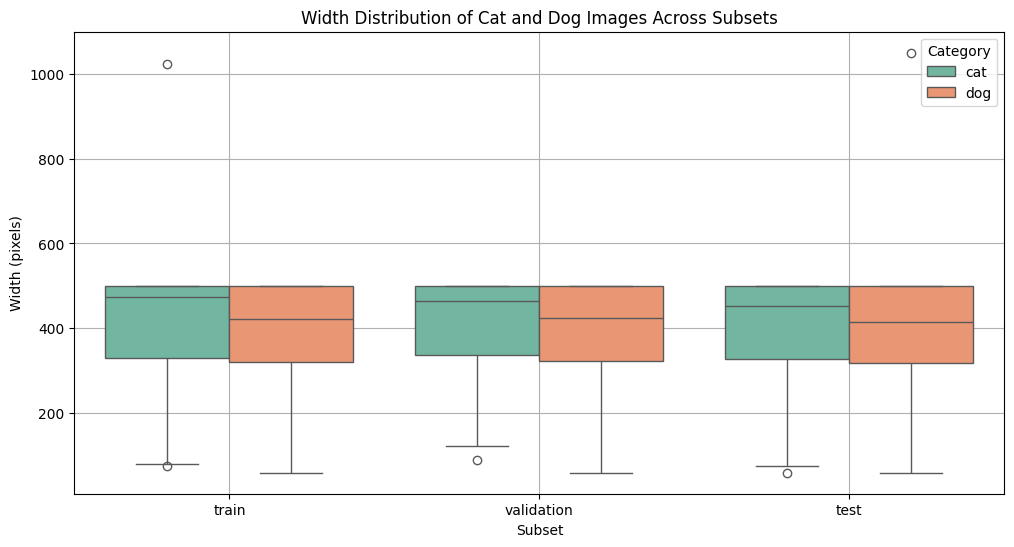

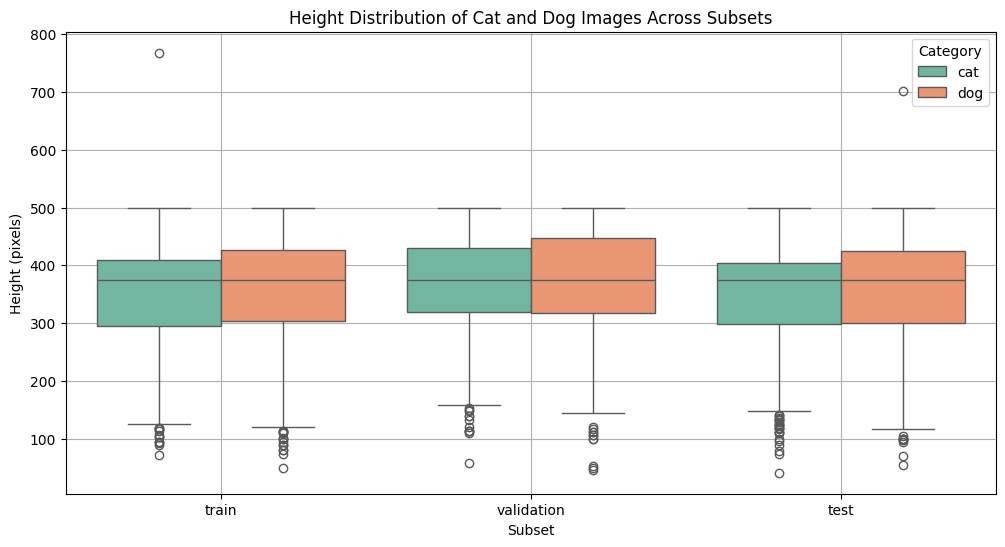

In [ ]:
from PIL import Image

def collect_image_dimensions(directory):
    """Collects image dimensions for cats and dogs in the specified directory."""
    dimensions = {
        'Subset': [],
        'Category': [],
        'Width': [],
        'Height': []
    }
    
    for subset in ['train', 'validation', 'test']:
        for category in ['cat', 'dog']:
            category_dir = os.path.join(directory, subset, category)
            if os.path.exists(category_dir):
                for img_file in os.listdir(category_dir):
                    img = Image.open(os.path.join(category_dir, img_file))
                    dimensions['Subset'].append(subset)
                    dimensions['Category'].append(category)
                    dimensions['Width'].append(img.size[0])  # width
                    dimensions['Height'].append(img.size[1])  # height

    return pd.DataFrame(dimensions)

# Collect dimensions for all subsets
data_dir = './data/dogs_cats_small'
dimensions_df = collect_image_dimensions(data_dir)

# Plotting dimensions using KDE plots
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dimensions_df[dimensions_df['Category'] == 'cat']['Width'], 
             label='Cat Widths', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=dimensions_df[dimensions_df['Category'] == 'cat']['Height'], 
             label='Cat Heights', color='lightblue', fill=True, alpha=0.5)
sns.kdeplot(data=dimensions_df[dimensions_df['Category'] == 'dog']['Width'], 
             label='Dog Widths', color='orange', fill=True, alpha=0.5)
sns.kdeplot(data=dimensions_df[dimensions_df['Category'] == 'dog']['Height'], 
             label='Dog Heights', color='salmon', fill=True, alpha=0.5)

plt.title('Image Dimensions Distribution for Cats and Dogs Across Subsets')
plt.xlabel('Dimensions (Pixels)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Boxplot for dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(data=dimensions_df, x='Subset', y='Width', hue='Category', palette='Set2')
plt.title('Width Distribution of Cat and Dog Images Across Subsets')
plt.ylabel('Width (pixels)')
plt.xlabel('Subset')
plt.legend(title='Category')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dimensions_df, x='Subset', y='Height', hue='Category', palette='Set2')
plt.title('Height Distribution of Cat and Dog Images Across Subsets')
plt.ylabel('Height (pixels)')
plt.xlabel('Subset')
plt.legend(title='Category')
plt.grid()
plt.show()

- KDE plots show that cat images have a consistent size range of 400-600 pixels, while dog images have a wider range of 300-500 pixels. This suggests that cat images are more consistent in size, while dog images show greater variability.
- The analysis of the width and height distributions reveals that cat images have narrower interquartile ranges in width and height, indicating uniform sizes around 400-600 pixels. Dog images, on the other hand, show wider ranges and greater variability, suggesting they may require additional preprocessing for consistency in model training, emphasizing the importance of considering image dimensions.

### 3. Training two networks (use callbacks to save the best model version):
#### a. Defining a Neural Network of choice

In [ ]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [9]:
# Define data folder path
data_folder = pathlib.Path('C:/Neha/Conestoga/CSCN8010/CSCN8010-labs/data/dogs_cats_small')

# Load datasets
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Here we are defining a Convolutional Neural Network(CNN)

In [10]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 904ms/step - accuracy: 0.5118 - loss: 0.7014 - val_accuracy: 0.5690 - val_loss: 0.6919
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 903ms/step - accuracy: 0.5222 - loss: 0.6932 - val_accuracy: 0.6010 - val_loss: 0.6918
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 903ms/step - accuracy: 0.5799 - loss: 0.6894 - val_accuracy: 0.5320 - val_loss: 0.7054
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 777ms/step - accuracy: 0.6028 - loss: 0.6618 - val_accuracy: 0.5840 - val_loss: 0.6651
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 841ms/step - accuracy: 0.6374 - loss: 0.6402 - val_accuracy: 0.6130 - val_loss: 0.6344
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 764ms/step - accuracy: 0.6801 - loss: 0.5962 - val_accuracy: 0.6300 - val_loss: 0.6192
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 850ms/step - accuracy: 0.6735 - loss: 0.5829 - val_accuracy: 0.6800 - val_loss: 0.5947
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7071 - loss: 0.5446 - val_accurac

- The model demonstrates a steady improvement in training accuracy, achieving 99.09% by epoch 30, but validation accuracy fluctuates, peaking at 76.2%. The increasing gap between training and validation loss suggests potential overfitting. The need for further regularization strategies may be necessary to enhance generalization.

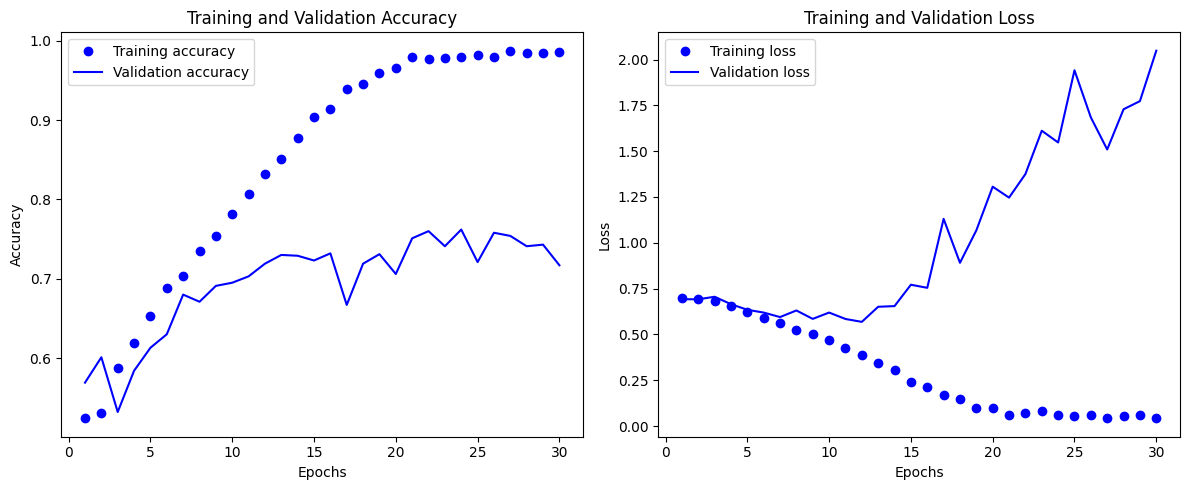

In [11]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(epochs, accuracy, "bo", label="Training accuracy")
ax1.plot(epochs, val_accuracy, "b", label="Validation accuracy")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Plot loss
ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

- The training and validation accuracy plot shows an increasing training accuracy, but the validation accuracy plateaus and fluctuates after around 10 epochs, indicating potential overfitting. Similarly, the loss plot demonstrates that while training loss decreases steadily, validation loss increases after around the same point, further confirming overfitting. Reducing the model complexity or applying regularization techniques (e.g., dropout) may be helpful to us further.

#### b. Fine-Tune VGG16 (pre-trained on imagenet). Making sure to use validation to test for over-fitting. Plotting the appropriate graph

In [12]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━

- The output shows efficient feature extraction from the dataset using the VGG16 model, with processing times per batch ranging from 3 to 21 seconds. This indicates that the model is effectively handling the image data, preparing it for subsequent training or evaluation stages.

In [14]:
conv_base.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

train_features.shape

(2000, 5, 5, 512)

- The train_features shape of (2000, 5, 5, 512) indicates that the model has extracted features from 2000 images, resulting in a feature map of size 5x5 with 512 channels. This dimensionality suggests that the convolutional base effectively captures complex patterns while reducing the spatial dimensions, preparing the data for classification.

In [15]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_vgg16 = keras.Model(inputs, outputs)

model_vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,277,313 (12.50 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 0 (0.00 B)

- The model_vgg16 has a total of 3,277,313 parameters, with a dense layer of 256 units following the flattening of the feature map. The inclusion of a dropout layer (0.5) helps mitigate overfitting, making the model more robust for binary classification tasks.

In [16]:
model_vgg16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./models/feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model_vgg16.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8486 - loss: 37.9409 - val_accuracy: 0.9580 - val_loss: 6.5865
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9866 - loss: 1.5827 - val_accuracy: 0.9580 - val_loss: 7.2919
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9790 - loss: 2.4432 - val_accuracy: 0.9640 - val_loss: 8.2553
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9870 - loss: 1.8157 - val_accuracy: 0.9790 - val_loss: 4.3564
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9960 - loss: 0.3233 - val_accuracy: 0.9810 - val_loss: 4.9868
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9935 - loss: 0.8737 - val_accuracy: 0.9700 - val_loss: 6.9134
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9921 - loss: 0.5560 - val_accuracy: 0.9820 - val_loss: 4.7928
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9980 - loss: 0.1728 - val_accuracy: 0.9790 - 

- During training, the model achieved nearly perfect accuracy (1.0000) by the end of 30 epochs, indicating it effectively learned the training data. However, the validation accuracy plateaued around 98%, with fluctuating validation loss.

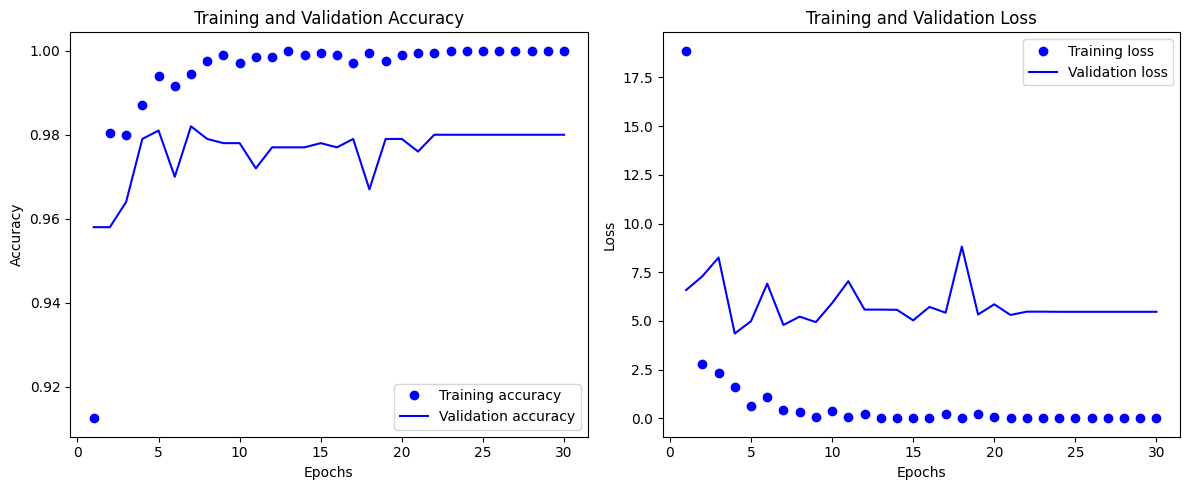

In [17]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(epochs, acc, "bo", label="Training accuracy")
ax1.plot(epochs, val_acc, "b", label="Validation accuracy")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Plot loss
ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

- The training and validation accuracy plot shows high and consistent accuracy for both datasets, suggesting good model performance without overfitting. The loss plot also indicates that training loss is very low, and validation loss stabilizes after initial fluctuations, reflecting a well-trained model.

### 4. Explore the relative performance of the models (make sure to load the best version of each model) (6 points): 
#### a. Accuracy
#### b. Confusion metric
#### c. Precision, recall, F1-score,
#### d. Precision-recall curve.
#### e. Explore specific examples in which the model failed to predict correctly.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

test_model_cnn = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model_cnn.evaluate(test_dataset)
print(f"Test accuracy for CNN: {test_acc:.3f}")

test_model_vgg16 = keras.models.load_model(
    "./models/feature_extraction.keras")
test_loss, test_acc = test_model_vgg16.evaluate(x=test_features, y=test_labels)
print(f"Test accuracy for VGG: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7108 - loss: 0.5993
Test accuracy for CNN: 0.714
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9771 - loss: 3.8303
Test accuracy for VGG: 0.974


- The CNN model achieved a test accuracy of approximately 71.4%, indicating moderate performance. 
- In contrast, the VGG16 model demonstrated significantly better accuracy at 97.7%, highlighting its effectiveness in feature extraction and generalization on the test dataset. This stark difference suggests that the VGG16 model is better suited for the classification task at hand.

In [19]:
vgg16_pred = (test_model_vgg16.predict(test_features) > 0.5).astype("int32")
cnn_pred = (test_model_cnn.predict(test_dataset) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step


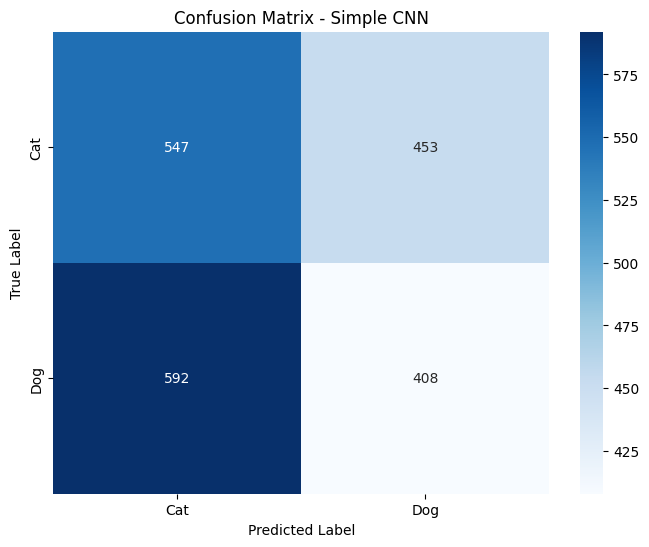

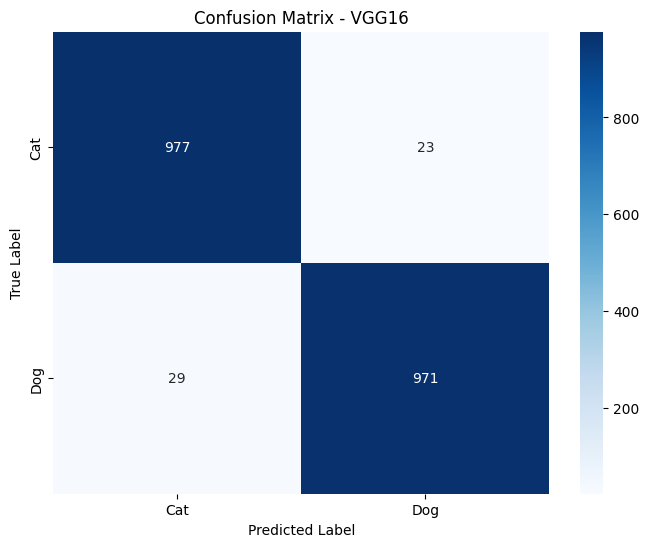

In [20]:
cm_simple_cnn = confusion_matrix(test_labels, cnn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_simple_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix - Simple CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_vgg16 = confusion_matrix(test_labels, vgg16_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- The confusion matrices reveal significant differences in model performance. 
- The Simple CNN misclassifies a considerable number of cat images (453 false positives) and dog images (592 false negatives), indicating weaker classification ability. 
- Conversely, the VGG16 model demonstrates high accuracy, with only 23 false positives for cats and 29 false negatives for dogs, showcasing its superior capability in distinguishing between the two classes.

In [21]:
# Classification report for Simple CNN
print("Simple CNN Classification Report:\n", classification_report(test_labels, cnn_pred, target_names=['Cat', 'Dog']))

print("VGG16 Classification Report:\n", classification_report(test_labels, vgg16_pred, target_names=['Cat', 'Dog']))

Simple CNN Classification Report:
               precision    recall  f1-score   support

         Cat       0.48      0.55      0.51      1000
         Dog       0.47      0.41      0.44      1000

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.47      2000
weighted avg       0.48      0.48      0.47      2000

VGG16 Classification Report:
               precision    recall  f1-score   support

         Cat       0.97      0.98      0.97      1000
         Dog       0.98      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



- The classification report for the Simple CNN shows low precision and recall, with F1-scores around 0.47 for both classes, indicating poor performance in distinguishing cats and dogs. In stark contrast, the VGG16 model achieves high precision and recall values (around 0.97), resulting in an overall accuracy of 97%, demonstrating its effectiveness and reliability in the classification task.

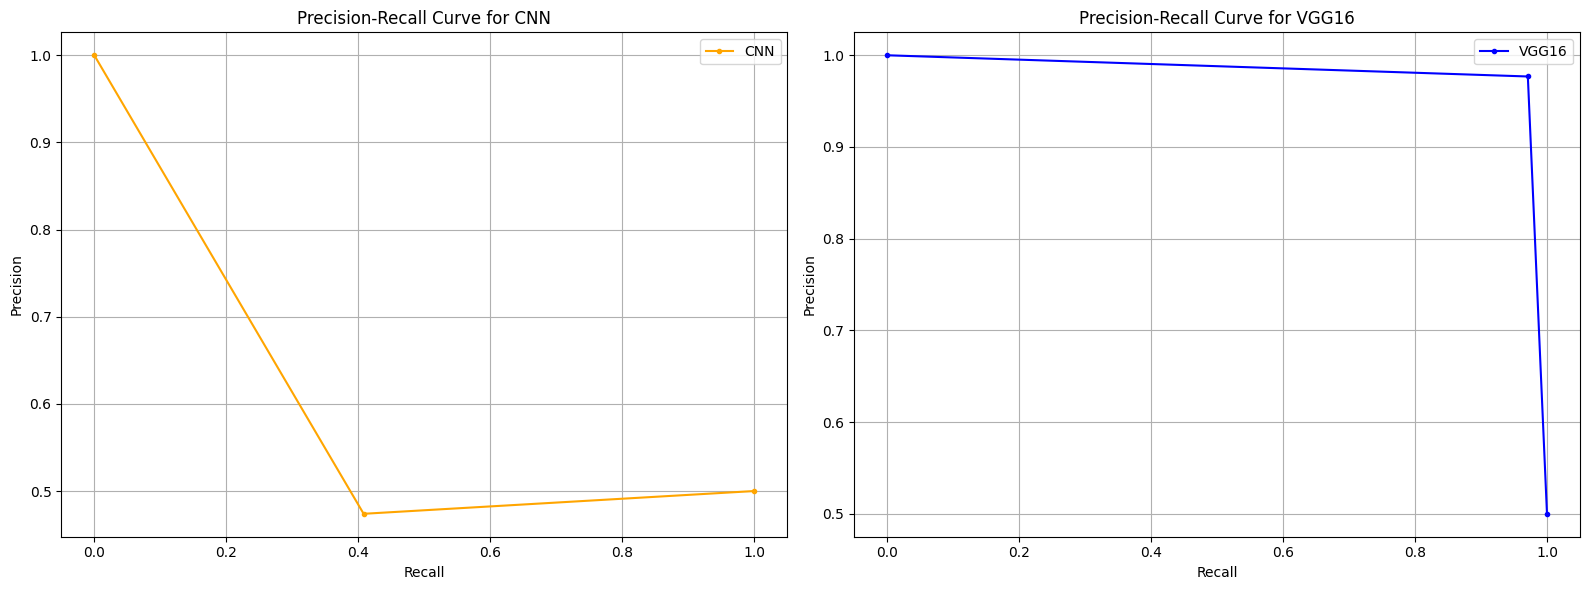

In [22]:
# Calculate precision and recall for CNN
precision_cnn, recall_cnn, _ = precision_recall_curve(test_labels, cnn_pred)

# Calculate precision and recall for VGG16
precision_vgg, recall_vgg, _ = precision_recall_curve(test_labels, vgg16_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Precision-Recall curve for CNN
ax1.plot(recall_cnn, precision_cnn, marker='.', color='orange', label='CNN')
ax1.set_title('Precision-Recall Curve for CNN')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.legend()
ax1.grid()

# Plot Precision-Recall curve for VGG16
ax2.plot(recall_vgg, precision_vgg, marker='.', color='blue', label='VGG16')
ax2.set_title('Precision-Recall Curve for VGG16')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend()
ax2.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

- The Precision-Recall curve for the Simple CNN shows a steep drop in precision at lower recall values, indicating a struggle to maintain accuracy across various thresholds. 
- In contrast, the VGG16 curve remains high and stable, reflecting its strong ability to balance precision and recall, thus confirming its superior classification performance.

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.0149174..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..252.61665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..244.24438].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.75424].
Clipping input data to the valid range for i

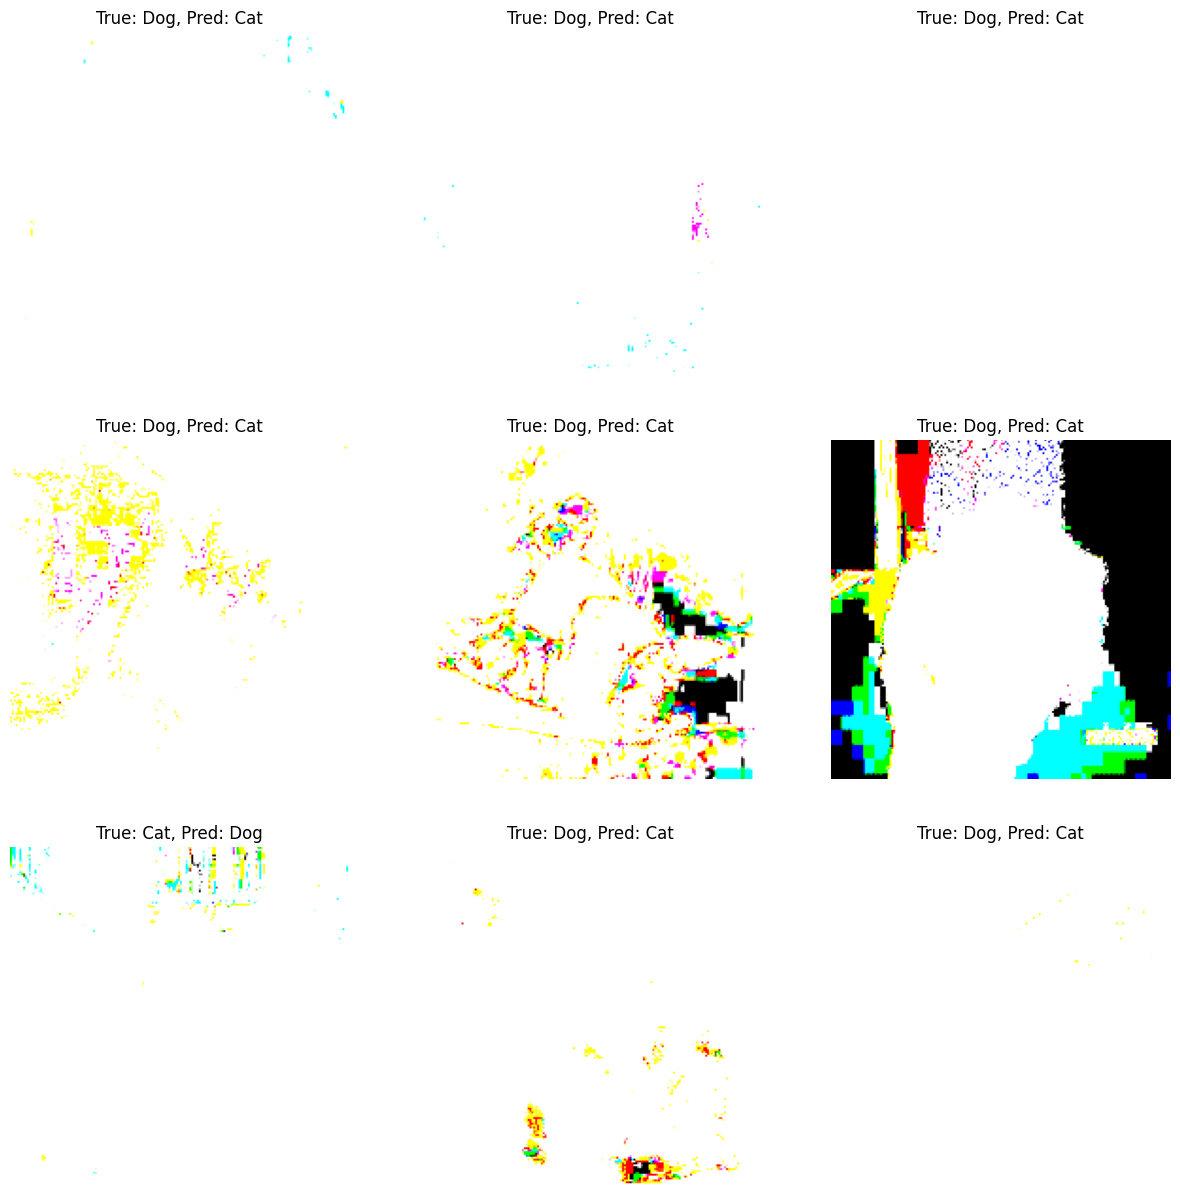

In [23]:
def plot_misclassified_images(model, test_dataset, true_labels):
    # Getting the images and predictions from the model
    predictions = (model.predict(test_dataset) > 0.5).astype("int32")
    
    # Extract images and true labels from the dataset
    images = []
    for images_batch, labels_batch in test_dataset:
        images.append(images_batch.numpy())  # Convert to numpy array
    
    # Concatenate to get all images
    images = np.concatenate(images)

    # Identify misclassified indices
    misclassified_indices = np.where(true_labels != predictions.flatten())[0]
    
    # Set up for plotting
    plt.figure(figsize=(15, 15))
    for i, index in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {'Dog' if true_labels[index] == 1 else 'Cat'}, Pred: {'Dog' if predictions[index] == 1 else 'Cat'}")
        plt.axis('off')
    plt.show()
    
plot_misclassified_images(test_model_cnn, test_dataset, test_labels)


- The displayed images reveal significant issues with the model's predictions, as many are misclassified with unexpected artifacts and color distortions. This indicates that the model struggles with certain inputs, leading to unclear visualizations and highlighting the need for further refinement and training to improve classification accuracy.

### 5. Conclusions
- In conclusion, the analysis reveals that the VGG16 model significantly outperforms the Simple CNN in the cat vs. dog classification task, achieving a test accuracy of approximately 97.7% compared to the Simple CNN's 71.4%. 
- The VGG16 model demonstrates high precision, recall, and F1-scores, effectively distinguishing between classes, while the Simple CNN struggles with considerable misclassifications and low performance metrics. 
- The visualizations of misclassified images further emphasize the need for advanced architectures and better feature extraction methods, illustrating the importance of leveraging pre-trained models for superior accuracy in complex classification tasks.

### 6. References:
1. Kaggle. (n.d.). Dogs vs. Cats. Retrieved from https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip
2. Poe. (n.d.). Assistant. Retrieved from https://poe.com/Assistant
3. Analytics Vidhya. (2020, February). Learn image classification using CNN (Convolutional Neural Networks): 3 datasets. Retrieved from https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
4. BuiltIn. (n.d.). VGG16. Retrieved from https://builtin.com/machine-learning/vgg16
5. Analytics Vidhya. (2020, August). Top 4 pre-trained models for image classification with Python code. Retrieved from https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/
6. Rosebrock, A. (2019, June 3). Fine-tuning with Keras and deep learning. PyImageSearch. Retrieved from https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/
7. Great Learning. (2020). Everything you need to know about VGG16. Medium. Retrieved from https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918
8. CSCN8010. (n.d.). Class notebooks. GitHub. Retrieved from https://github.com/CSCN8010/CSCN8010/tree/main/class_notebooks